# Predicting the market value of pre-loved luxury bags

### Introduction:

In this doc we will propose a model to predict the resale value of luxury second hand bags. We will start by providing techniques on how to source the data from reliable sources across the internet and later walk you through how to build a prediction model using gradient boosting regression algorithm with 80% accuracy. At the end we will disscuss a set of key insights derived from this analysis which can be used across the market of luxury resale to maximize profit.

### The Objective:
Using the features of a high-end bag (color, material, size, style ...) to predict its resale value.

### The Motivation:
The **luxury fashion market** has grown tremendously in the last couple of years. Driven by the popularity of luxury goods amongst Millenials, brands such as Gucci have grown with 40% in 2019. Since the world is now also caring about **sustainability**, the market of used **'pre-loved' luxury goods** has exploded as well, with platforms such as TheRealReal, Tradesy and Poshmark taking the lead. Reselling platforms typically host two types of sellers: people selling from their own closet, and professional resellers flipping products for a profit. Professional resellers are on the rise, but often have to invest a lot of time to be succesful. One of the difficulties resellers of luxury goods have is to accurately predict the resale value of a product, since no tools are available for that and they have to rely on experience and manually searching websites.

**To help resellers save time and maximize their profit, I've built a tool in this project that can predict the resale value of a bag with 80% accuracy.**

I will be focussing on bags of one of the most popular luxury brands: CHANEL.

### The Methodology
- Data acquisition
- Data inspection
- Data wrangling
- Data visualization & insights
- Building a prediction model

### The Technologies used
- Beautiful Soup for webscraping 
- Pandas and Numpy for Data Manipulation
- Matplotlib / Seaborn for Data visualization
- Scikit Learn / XGBoost to build a prediction model

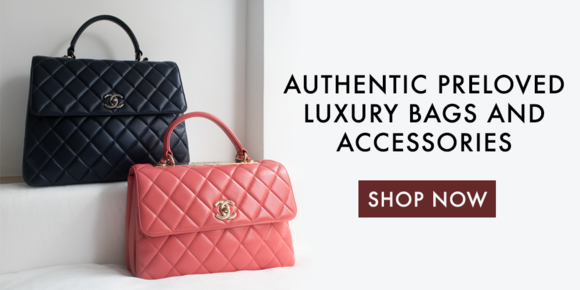

## 1. Data acquisition: web scraping Amore.com with Beautiful Soup

Amore.com has over 2000 pre-loved CHANEL bags listed. Listings include resale price, as well as many features of the bag: style, color, type of leather, condition, etc. I will be scraping this website to obtain a relevant data set.

In [131]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
# this line is needed to display plots in jupyter notebooks
%matplotlib inline
#used to open URLs
import urllib.request
from urllib.request import Request, urlopen
import requests
#used to extract data from html files
from bs4 import BeautifulSoup
from requests import get
import csv

In [94]:
#CREATE A LIST TO PUT IN EXTRACTED PRODUCT DETAILS

# start with an empty list - add headers
rows = []
rows.append(['prname','page2','price','authnumber','sizeInch',
             'color_material','accessories','outside_condition',
             'inside_condition','other','smell','product_nr'])

#there are 73 pages
for i in range(1,74):

    # specify the url 
    pagenr = str(i)
    urlpage =  'https://amorevintagejapan.com/collections/chanel/bags?page='+pagenr+'&sort_by=best-selling'
    print(urlpage)
    #print(urlpage)
    req = urllib.request.Request(urlpage)
    # providing a basic user-agent so our scraper doesn't get blocked
    # query the website and return the html to the variable 'page'
    req.add_header('User-Agent', 'Mozilla/5.0')
    page = urllib.request.urlopen(req)
    soup = BeautifulSoup(page, 'html.parser')
    
    #here we are only getting the sold out products from a page

    #in the soup find all product cards
    results = soup.find_all('div',attrs={'class': 'grid__item grid-product small--one-half medium-up--one-quarter'})
    #check if the results we got corresponds to the number of elements on a page
    #print('Number of results', len(results))
    #printing the first row of results
    #print(results[1])
    
    #GET THE INFO FROM EACH ITEM IN THE PAGE
    for i in range(len(results)):
        #go per item/line of results
        data = results[i]

        #extract seperate elements
        page2 = data.find('a').get('href')
        prname = data.find('div',attrs={'class': 'grid-product__title grid-product__title--body'}).getText()
        price = data.find('span',attrs={'class': 'money'}).getText()
        price = price.strip('¥').strip('JPY ').replace('','')

        # go the the product's own page
        url2 = 'https://amorevintagejapan.com/'+page2
        req2 = urllib.request.Request(url2)
        req2.add_header('User-Agent', 'Mozilla/5.0')
        getpage = urllib.request.urlopen(req2)
        soup2 = BeautifulSoup(getpage, 'html.parser')
        #in the soup find the table with product details
        itemdetails = soup2.find_all('table',attrs={'class': 'item_info'})
        lines = soup2.find('table').find_all('td')

        #GETTING SEPERATE ELEMENTS FROM PRODUCT DETAILS TABLE
        authnumber = lines[0].getText()
        sizeinch = lines[2].getText()
        color_material = lines[4].getText()
        accessories = lines[5].getText()
        outside_condition = lines[-4].getText()
        inside_condition = lines[-3].getText()
        other = lines[-2].getText()
        smell = lines[-1].getText()
        product_nr = lines[6].getText()

        #CLEANING UP DATA
        authnumber = authnumber.strip('\n\r').replace('','')
        # sizeinch is a string, manipulate further to clean up?
        # could slice sizeinch in some way to extract strapdrop as a seperate element
        sizeinch = sizeinch.strip('\n\r').replace('','')
        # could slice color_material in some way to extract seperate elements - or later in pandas
        color_material = color_material.strip('\n\r').replace('','')
        accessories = accessories.strip('\n\r').replace('','')
        outside_condition = outside_condition.strip('\n\r').replace('','')
        # may need further cleaning up still contains \r\n\r\n
        inside_condition = inside_condition.strip('\n\r').replace('','')
        other = other.strip('\n\r').replace('','')
        smell = smell.strip('\n\r').replace('','')
        product_nr = product_nr.strip('\n\r').replace('','')

        rows.append([prname, page2, price,authnumber,sizeinch,color_material,
                     accessories,outside_condition,inside_condition,other,smell,product_nr])

print(rows)
    

https://amorevintagejapan.com/collections/chanel/bags?page=1&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=2&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=3&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=4&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=5&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=6&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=7&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=8&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=9&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=10&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=11&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=12&sort_by=best-selling
https://amore

In [95]:
## Create csv and write rows to output file
with open('amoreChanel.csv','w', newline='') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerows(rows)

In [98]:
from urllib.request import Request, urlopen
import requests


#CREATE A LIST TO PUT IN EXTRACTED PRODUCT DETAILS

# start with an empty list - add headers
rows = []
rows.append(['prname','page2','price','authnumber','sizeInch',
             'color_material','accessories','outside_condition',
             'inside_condition','other','smell','product_nr'])

#there are 73 pages
for i in range(1,74):

    # specify the url 
    pagenr = str(i)
    urlpage =  'https://amorevintagejapan.com/collections/chanel/bags?page='+pagenr+'&sort_by=best-selling'
    print(urlpage)
    #print(urlpage)
    req = urllib.request.Request(urlpage)
    # providing a basic user-agent so our scraper doesn't get blocked
    # query the website and return the html to the variable 'page'
    req.add_header('User-Agent', 'Mozilla/5.0')
    page = urllib.request.urlopen(req)
    soup = BeautifulSoup(page, 'html.parser')
    
    #here we are only getting the sold out products from a page

    #in the soup find all product cards
    results = soup.find_all('div',attrs={'class': 'grid__item grid-product small--one-half medium-up--one-quarter grid-product__has-quick-shop'})
    #check if the results we got corresponds to the number of elements on a page
    #print('Number of results', len(results))
    #printing the first row of results
    #print(results[1])
    
    #GET THE INFO FROM EACH ITEM IN THE PAGE
    for i in range(len(results)):
        #go per item/line of results
        data = results[i]

        #extract seperate elements
        page2 = data.find('a').get('href')
        prname = data.find('div',attrs={'class': 'grid-product__title grid-product__title--body'}).getText()
        price = data.find('span',attrs={'class': 'money'}).getText()
        price = price.strip('¥').strip('JPY ').replace('','')

        # go the the product's own page
        url2 = 'https://amorevintagejapan.com/'+page2
        req2 = urllib.request.Request(url2)
        req2.add_header('User-Agent', 'Mozilla/5.0')
        getpage = urllib.request.urlopen(req2)
        soup2 = BeautifulSoup(getpage, 'html.parser')
        #in the soup find the table with product details
        itemdetails = soup2.find_all('table',attrs={'class': 'item_info'})
        lines = soup2.find('table').find_all('td')

        #GETTING SEPERATE ELEMENTS FROM PRODUCT DETAILS TABLE
        authnumber = lines[0].getText()
        sizeinch = lines[2].getText()
        color_material = lines[4].getText()
        accessories = lines[5].getText()
        outside_condition = lines[-4].getText()
        inside_condition = lines[-3].getText()
        other = lines[-2].getText()
        smell = lines[-1].getText()
        product_nr = lines[6].getText()

        #CLEANING UP DATA
        authnumber = authnumber.strip('\n\r').replace('','')
        # sizeinch is a string, manipulate further to clean up?
        # could slice sizeinch in some way to extract strapdrop as a seperate element
        sizeinch = sizeinch.strip('\n\r').replace('','')
        # could slice color_material in some way to extract seperate elements - or later in pandas
        color_material = color_material.strip('\n\r').replace('','')
        accessories = accessories.strip('\n\r').replace('','')
        outside_condition = outside_condition.strip('\n\r').replace('','')
        # may need further cleaning up still contains \r\n\r\n
        inside_condition = inside_condition.strip('\n\r').replace('','')
        other = other.strip('\n\r').replace('','')
        smell = smell.strip('\n\r').replace('','')
        product_nr = product_nr.strip('\n\r').replace('','')

        rows.append([prname, page2, price,authnumber,sizeinch,color_material,
                     accessories,outside_condition,inside_condition,other,smell,product_nr])

print(rows)


https://amorevintagejapan.com/collections/chanel/bags?page=1&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=2&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=3&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=4&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=5&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=6&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=7&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=8&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=9&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=10&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=11&sort_by=best-selling
https://amorevintagejapan.com/collections/chanel/bags?page=12&sort_by=best-selling
https://amore

In [99]:
## Create csv and write rows to output file
with open('amoreChanel2.csv','w', newline='') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerows(rows)    

## 2. Inspecting and understanding the data

Because of the nature of the data (few numerical /continuous variables) - Initial quality control and inspecting in Excel.
After we can proceed in Pandas.

In [127]:
# reading in the previously generated data in pandas
df = pd.read_csv('AmoreChanel_alldata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 12 columns):
prname               2011 non-null object
page2                2011 non-null object
price                2011 non-null int64
authnumber           1834 non-null object
sizeInch             2011 non-null object
color_material       2011 non-null object
accessories          2011 non-null object
outside_condition    2011 non-null object
inside_condition     2007 non-null object
other                1673 non-null object
smell                1965 non-null object
product_nr           2011 non-null object
dtypes: int64(1), object(11)
memory usage: 188.7+ KB


In [128]:
df.head(6)

,prname,page2,price,authnumber,sizeInch,color_material,accessories,outside_condition,inside_condition,other,smell,product_nr
0,CHANEL Quilted CC Chain Shoulder Bag BK Caviar...,/collections/chanel/products/ao00006,298000,3067681,"W 12 x H 10.0 x D 3.0 ""\n\nStrap Drop. 20.9 """,Black / Caviar Skin Leather,"Authenticity Seal, Authenticity Card, Dust Bag...","There is a Scuff, good condition","There is a Wrinkle, Dirt, use",-,-,AO00006
1,CHANEL Quilted Chain 2way Hand Bag Beige,/collections/chanel/products/ao23462,328000,1210147,"W 7.7 x H 5.9 x D 2.2 ""\n\nHandle Drop. 1.2 ""\...",Beige/ Leather,"Authenticity Seal, Authenticity Card, Shoulder...",Good Condition,Good Condition,-,-,AO23462
2,CHANEL Quilted Chain Belt Attachment Pouch Black,/collections/chanel/products/ao23074,228000,NaN,"W 3.5 x H 3.1 x D 1.6 ""\r\n\r\nStrap Drop : 3.5 """,Black/ Leather,Box,Good Condition,There is sign of use overall\r\n\r\nEdge: Mino...,-,-,AO23074
3,CHANEL Quilted Cosmetic Vanity Hand Bag Black,/collections/chanel/products/ao21157,98000,4268626,"W 5.9 x H 6.7 x D 4.7 ""\r\n\r\nHandle Drop. 1.2 """,Black/ Leather,"Authenticity Seal, Dust Bag, Box",Excellent Condition\r\n\r\nScratches,Excellent Condition,-,-,AO21157
4,CHANEL Mademoiselle Classic Flap Mini Square S...,/collections/chanel/products/ao11085,698000,2838869,"W 6.7 x H 5.5 x D 2.4 ""\r\nStrap Drop. 20.1 """,Red\r\n/ Caviar Skin Leather,Authenticity Seal,"Though there is a little feeling of used, good...",Though there is a little feeling of used,-,-,AO11085
5,CHANEL Quilted Fringe Chain Shoulder Bag Black,/collections/chanel/products/ao09352,298000,2560690,"W 10.6 x H 7.9 x D 2.8 ""\r\n\r\nShoulder Drop....",Black\r\n/ Caviar Skin,Authenticity Seal,There is sign of used overall.\r\n\r\nLeather ...,Though there is a little feeling of used and m...,-,Smell of perfume.,AO09352


Conclusions from initial inspection: apart from price, all other columns contain object-type variables, will need transformation to be useful for further analysis. severall columns have missing data points, we will have to deal with that too

## 3. Data wrangling

After inspecting and understanding the data we know how to transform and map the data from its "raw" form into another format which will be more appropriate and valuable for analytical purposes. 

we will be using the following game plan:

1) *price* column: values are currently in JYP / Japan Yen, we'll convert this column to USD to better understand the values

2) *authnumber* : this is the authenticity code of each item which is unique for each item but also contains the year or production. We will decode each number according to CHANEL's system, see https://www.yoogiscloset.com/authenticate/chanel

3) the column *authnumber* has some missing values, since this is only a smaller portion of the dataset, we will be dropping the rows with missing *authnumber*

4) I will encode the *sizeInch* column and use this information to subdivide each bag into the following size categories: mini - small - medium - large -Xlarge

5) *color_material* contains both the color and the material of each item. we will seperate these two out and create a new column for each (can later be encoded)

6) the *accessories* column tells us which of the original accessories come with the bag. These accessories are: authenticity seal, authenticity card, dust bag, box and manual. I will encode this column: for each item present +1 is added to a base score of 0 (=no accessories inlcuded.

7) The column *outside_condition* and *inside_condition* both contain a lot of text. Using the information in these columns I will assign one of the following conditions to each item, both for interior and exterior seperately: Excellent condition - Good condition - Used condition 

8) The *other* column is empty for most items, but if present it contains information on defects that the bag has (rips, tears, discoloration etc.). Since this is still useful I will encode this column: 0 when empty, and 1 when containing a details on some kind of defect.

9) *smell* can be handled in the same way as *other*, if the *smell* value is empty it means the bag doesn't have a noticable bad smell (score 0), if not there is some sort of smell such as mold or cigarette smoke (score 1) 

10) *product_nr* does not contain any useful info and can be deleted

11) *page2* contains the weblink to each produch item's product page and can also be deleted at this point

12) from the *prname* column I can extract a number or interesting features. CHANEL bags have some characteristics which make them stand out in comparison to other brands: Quilted leather, a leather interlaced chain-link strap and the interlocking double C logo. we can extract the presents and absence of each of these features in each item from the *prname* column. I will create 3 new columns each binary encoded: *has_chain*, *has_logo*, *has_quilts*.

13) Another interesting feature which can be extracted from the the *prname* column is the bag style: Tote bag, Backpack, Clutch, etc.

14) After all interesting info is extracted from *prname* we will also delete this column

Note that after these transformations we will have only one column with **continuous (numerical) data**: *price*, our response variable. The other columns will contain both **numerical discrete data** (such as number of accessoiries) and **categorical variables** (both nominal and ordinal). When building a prediction model later on, the latter type will need to be further encoded.

In [129]:
#1) convert price JYP to USD 
df.price = df.price.apply(lambda x: int(x*0.0093))


#3) drop missing values of authnumber 
df = df[df['authnumber'].notna()]


#2) convert the authenticity numbers to their year of production - using buckets here
def authnumber_convert(row):
    row.authnumber = str(row.authnumber)
    if len(row.authnumber) == 6 or len(row.authnumber) == 7 and row.authnumber[0] == '0' or len(row.authnumber) == 7 and row.authnumber[0] == '1':
        return '1985-1990'
    elif len(row.authnumber) == 7 and row.authnumber[0] == '2' or len(row.authnumber) == 7 and row.authnumber[0] == '3': 
        return '1990-1995'
    elif len(row.authnumber) == 7 and row.authnumber[0] == '4' or len(row.authnumber) == 7 and row.authnumber[0] == '5': 
        return '1995-1999'        
    elif len(row.authnumber) == 7 and row.authnumber[0] == '6' or len(row.authnumber) == 7 and row.authnumber[0] == '7'or len(row.authnumber) == 7 and row.authnumber[0] == '8': 
        return '2000-2004'        
    else:
        return '2005-2010' 
   
df['production_year'] = df.apply(authnumber_convert,axis='columns')
df.drop(['authnumber'], axis=1, inplace=True)


#4) convert sizeInch to size classes
def get_size(row):
    row.sizeInch = row.sizeInch[2:6]
    if 'x' in row.sizeInch:
        row.sizeInch = row.sizeInch.strip('x').replace('','') 
    row.sizeInch = float(row.sizeInch)
    if row.sizeInch <5:
        return "mini"
    elif row.sizeInch <10:
        return "small"
    elif row.sizeInch <12:
        return "medium"    
    elif row.sizeInch <15:
        return "large"  
    else:
        return "xlarge"
   
df['size'] = df.apply(get_size,axis='columns')
df.drop(['sizeInch'], axis=1, inplace=True)


#5.1) Create a color column and extract info from color_material
def get_color(row):
    if 'Black' in row.color_material:
        return "Black"
    elif 'Beige' in row.color_material or 'Cream' in row.color_material:
        return "Beige"
    elif 'Brown' in row.color_material:
        return "Brown"
    elif 'Blue' in row.color_material or 'Navy' in row.color_material or 'Indigo' in row.color_material:
        return "Blue"  
    elif 'Red' in row.color_material or 'Bordeaux' in row.color_material or 'Cherry' in row.color_material or 'Burgundy' in row.color_material:
        return "Red" 
    elif 'Yellow' in row.color_material:
        return "Yellow"
    elif 'Pink' in row.color_material:
        return "Pink"    
    elif 'Gold' in row.color_material or 'Silver' in row.color_material or 'Bronze' in row.color_material:
        return "Metallic"
    elif 'Orange' in row.color_material:
        return "Orange"
    elif 'Purple' in row.color_material or 'Violet' in row.color_material:
        return "Purple"   
    elif 'White' in row.color_material or 'Ivory' in row.color_material:
        return "White"    
    elif 'Gray' in row.color_material:
        return "Gray"    
    elif 'Green' in row.color_material or 'Khaki' in row.color_material:
        return "Green"
    else:
        return "Other"
        
df['color'] = df.apply(get_color,axis='columns')


#5.2) Create a material column and extract info from color_material
def get_material(row):
    if 'Caviar' in row.color_material:
        return "Caviar"
    elif 'Suede' in row.color_material:
        return "Suede"
    elif 'Patent' in row.color_material:
        return "Patent"
    elif 'Velvet' in row.color_material:
        return "Velvet"  
    elif 'Denim' in row.color_material:
        return "Denim"        
    elif 'Nylon' in row.color_material or 'Canvas' in row.color_material or 'Cotton' in row.color_material or 'Satin' in row.color_material:
        return "Fabric"     
    elif 'Tweed' in row.color_material:
        return "Tweed"  
    elif 'Rubber' in row.color_material or 'Plastic' in row.color_material or 'Vinyl' in row.color_material:
        return "Synthetic"
    elif 'Fur' in row.color_material or 'Lizard' in row.color_material or 'Crocodille' in row.color_material:
        return "Exotic"    
    else:
        return "Lambskin"
        
df['material'] = df.apply(get_material,axis='columns')
df.drop(['color_material'], axis=1, inplace=True)

#6) count the number of accessories
def get_numacc(row):
    counting = 1
    if 'Dust Bag' in row.accessories:
        counting += 1
    if 'Box' in row.accessories:
        counting += 1
    if 'Manual' in row.accessories:
        counting += 1
    if 'Card' in row.accessories:
        counting += 1
    if 'Pouch' in row.accessories:
        counting += 1
    return counting    
        
df['acc_included'] = df.apply(get_numacc,axis='columns')

df.head(10)
df.drop(['accessories'], axis=1, inplace=True)


#7.1) convert outside.condition column
def get_outcond(row):
    if 'Used' in row.outside_condition or 'Use' in row.outside_condition or 'used' in row.outside_condition or 'use' in row.outside_condition:
        return "Used"
    elif 'Excellent' in row.outside_condition or 'excellent' in row.outside_condition:
        return "Excellent"
    else:
        return "Good"
    
df['condition_ext'] = df.apply(get_outcond,axis='columns')
df.drop(['outside_condition'], axis=1, inplace=True)


#7.1) convert inside.condition column
df.drop(df.index[1765])
def get_incond(row):
    row.inside_condition = str(row.inside_condition)    
    if 'Used' in row.inside_condition or 'Use' in row.inside_condition or 'used' in row.inside_condition or 'use' in row.inside_condition:
        return "Used"
    elif 'Excellent' in row.inside_condition or 'excellent' in row.inside_condition:
        return "Excellent"
    else:
        return "Good"
    
df['condition_int'] = df.apply(get_incond,axis='columns')
df.drop(['inside_condition'], axis=1, inplace=True)


#8) Convert other column to binary
def get_otherdefects(row):
    row.other = str(row.other)    
    if '-' in row.other:
        return 0
    else:
        return 1
    
df['other_defects'] = df.apply(get_otherdefects,axis='columns')
df.drop(['other'], axis=1, inplace=True)


#9) Convert smell column to binary
def smelly(row):
    row.smell = str(row.smell)    
    if '-' in row.smell:
        return 0
    else:
        return 1
    
df['has_smell'] = df.apply(smelly,axis='columns')
df.drop(['smell'], axis=1, inplace=True)


#10) drop product_nr
df.drop(['product_nr'], axis=1, inplace=True)

#11) drop page2
df.drop(['page2'], axis=1, inplace=True)


#12.1) create column has_chain from prname
def has_chains(row):
    row.prname = str(row.prname)    
    if 'Chain' in row.prname:
        return 1
    else:
        return 0
    
df['has_chain'] = df.apply(has_chains,axis='columns')


#12.2) create column has_logo from prname
def get_logo(row):
    row.prname = str(row.prname)    
    if 'Logo' in row.prname or 'CC' in row.prname or 'Logos' in row.prname:
        return 1
    else:
        return 0
    
df['has_logo'] = df.apply(get_logo,axis='columns')


#12.3) create column has_quilts from prname
def get_quilts(row):
    row.prname = str(row.prname)    
    if 'Quilted' in row.prname:
        return 1
    else:
        return 0
    
df['has_quilts'] = df.apply(get_quilts,axis='columns')


#13) create column bagstyle from prname
def get_style(row):
    row.prname = str(row.prname)    
    if 'Classic' in row.prname and 'Flap' in row.prname:
        return "Classic Flap"
    elif 'Flap' in row.prname:
        return "Other Flap"
    elif 'Cross Body' in row.prname:
        return "Crossbody"
    elif 'Pouch' in row.prname or 'Clutch' in row.prname or "Pochette" in row.prname:
        return "Clutch"
    elif 'Bum' in row.prname:
        return "Bum Bag" 
    elif 'Tote' in row.prname:
        return "Tote"
    elif 'Vanity' in row.prname:
        return "Vanity Case"
    elif 'Mini' in row.prname:
        return "Mini bag"
    elif 'Backpack' in row.prname:
        return "Backpack"
    elif 'Woc' in row.prname:
        return "Woc"    
    elif 'Hand' in row.prname:
        return "Hand Bag"
    else:
        return "Shoulder Bag"
        
df['bag_style'] = df.apply(get_style,axis='columns')


#14) drop prname
df.drop(['prname'], axis=1, inplace=True)

df.head(10)

,price,production_year,size,color,material,acc_included,condition_ext,condition_int,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style
0,2771,1990-1995,large,Black,Caviar,4,Good,Used,0,0,1,1,1,Shoulder Bag
1,3050,1985-1990,small,Beige,Lambskin,2,Good,Good,0,0,1,0,1,Hand Bag
3,911,1995-1999,small,Black,Lambskin,3,Excellent,Excellent,0,0,0,0,1,Vanity Case
4,6491,1990-1995,small,Red,Caviar,1,Used,Used,0,0,0,0,0,Classic Flap
5,2771,1990-1995,medium,Black,Caviar,1,Used,Used,0,1,1,0,1,Shoulder Bag
6,3236,1990-1995,small,Black,Lambskin,1,Used,Used,0,0,0,0,1,Classic Flap
7,3422,1990-1995,large,Other,Lambskin,3,Good,Good,0,1,0,0,1,Classic Flap
8,742,1990-1995,small,Black,Lambskin,2,Good,Good,0,0,0,1,1,Hand Bag
9,1562,1990-1995,medium,Black,Caviar,2,Good,Good,0,0,1,1,1,Tote
10,3701,1985-1990,small,Metallic,Lambskin,1,Good,Good,0,0,1,1,1,Mini bag


In [130]:
# putting the clean data in a new csv file
df.to_csv('AmoreChanel_clean.csv')

## 4. Data visualization and insights

In [40]:
# import statements
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
# this line is needed to display plots in jupyter notebooks
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [41]:
#reading in the clean dataset
df = pd.read_csv('AmoreChanel_clean.csv', index_col="index",header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834 entries, 0 to 2010
Data columns (total 14 columns):
price              1834 non-null int64
production_year    1834 non-null object
size               1834 non-null object
color              1834 non-null object
material           1834 non-null object
acc_included       1834 non-null int64
condition_ext      1834 non-null object
condition_int      1834 non-null object
other_defects      1834 non-null int64
has_smell          1834 non-null int64
has_chain          1834 non-null int64
has_logo           1834 non-null int64
has_quilts         1834 non-null int64
bag_style          1834 non-null object
dtypes: int64(7), object(7)
memory usage: 214.9+ KB


In [152]:
df.columns

Index(['price', 'production_year', 'size', 'color', 'material', 'acc_included',
       'condition_ext', 'condition_int', 'other_defects', 'has_smell',
       'has_chain', 'has_logo', 'has_quilts', 'bag_style'],
      dtype='object')

### 4.1 Distributions

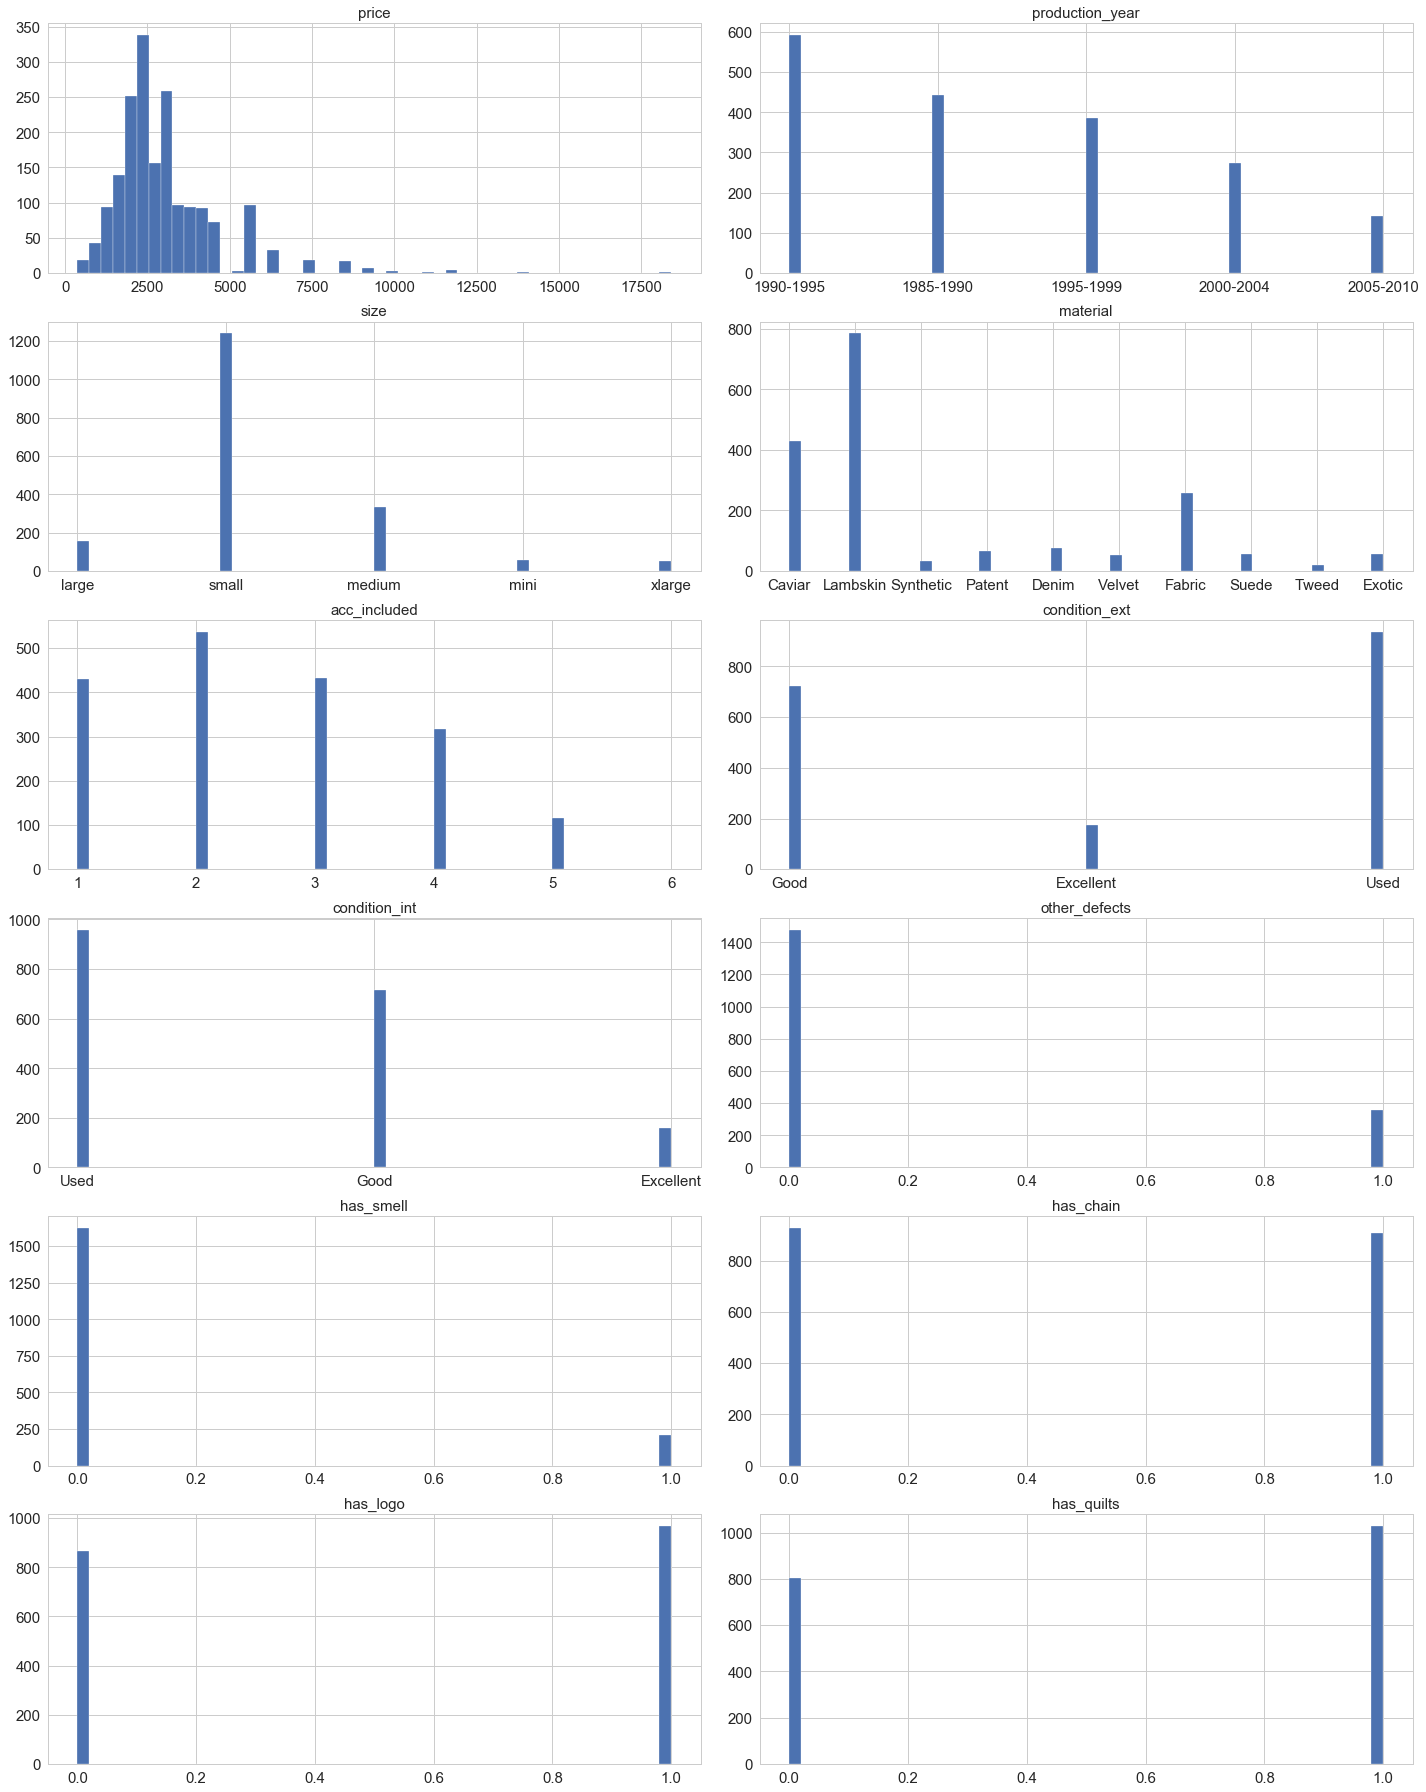

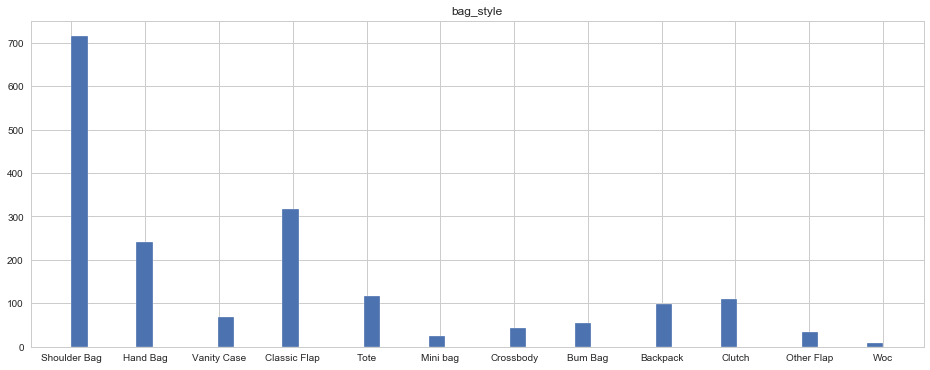

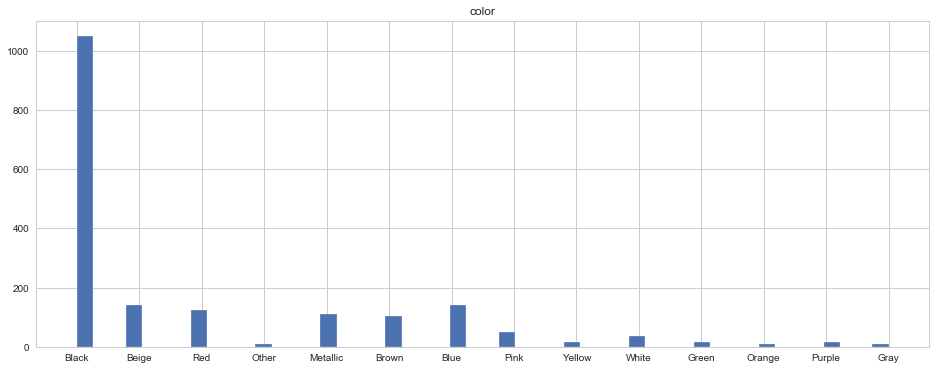

In [215]:
#look at the distribution of the variables


cols = ['price', 'production_year', 'size', 'material', 'acc_included',
       'condition_ext', 'condition_int', 'other_defects', 'has_smell',
       'has_chain', 'has_logo', 'has_quilts']

fig, axes = plt.subplots(6,2, figsize=(20,25))

for i in range(12):
    ax = axes[i//2][i%2]
    ax.hist(df[cols[i]],bins=50)
    ax.set_title(cols[i], fontsize=15)
    #ax.xaxis.set_tick_params(labelsize=15)
    ax.tick_params(labelsize=15) #- changes fontsize of both axes

plt.tight_layout()    
    
fig = plt.figure(figsize=(16, 6))
x = df['bag_style']
plt.title('bag_style')
_ = plt.hist(x, bins=50)   
    
fig = plt.figure(figsize=(16, 6))
x = df['color']
plt.title('color')
n = plt.hist(x, bins=50) 

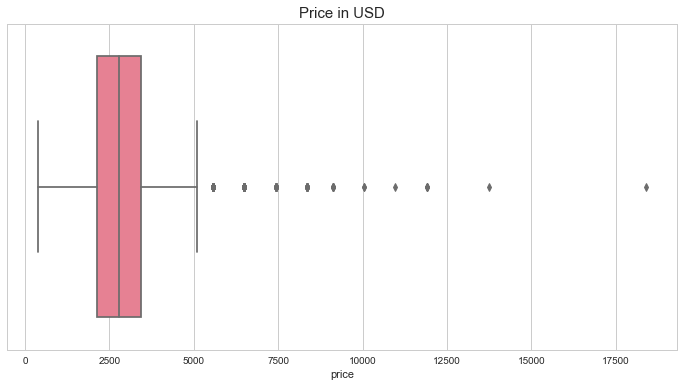

In [217]:
plt.figure(figsize=(12,6))
plt.title("Price in USD",fontsize=15)
g = sns.boxplot(x=df['price'], data=df, palette='husl',)

In [228]:
df.price.describe()


count     1834.000000
mean      3019.997274
std       1585.453029
min        370.000000
25%       2120.000000
50%       2771.000000
75%       3422.000000
max      18414.000000
Name: price, dtype: float64

In [226]:
df.price.median()

2771.0

The distribution of price is skewed to the right - not that dramatic, but since we're not interested anyway in bags above 6000 USD, we can remove these outliers.

In [42]:
df=df.loc[(df.price<6000)]
df.price.describe()

count    1751.000000
mean     2787.418047
std      1122.651177
min       370.000000
25%      1841.000000
50%      2492.000000
75%      3422.000000
max      5561.000000
Name: price, dtype: float64

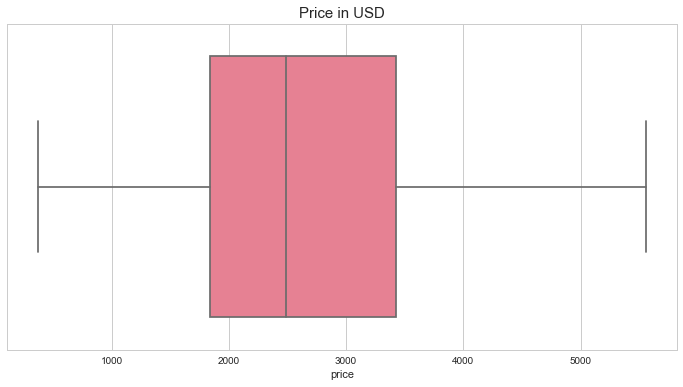

In [230]:
plt.figure(figsize=(12,6))
plt.title("Price in USD",fontsize=15)
g = sns.boxplot(x=df['price'], data=df, palette='husl',)
#g.set_xlabel("Price in USD")

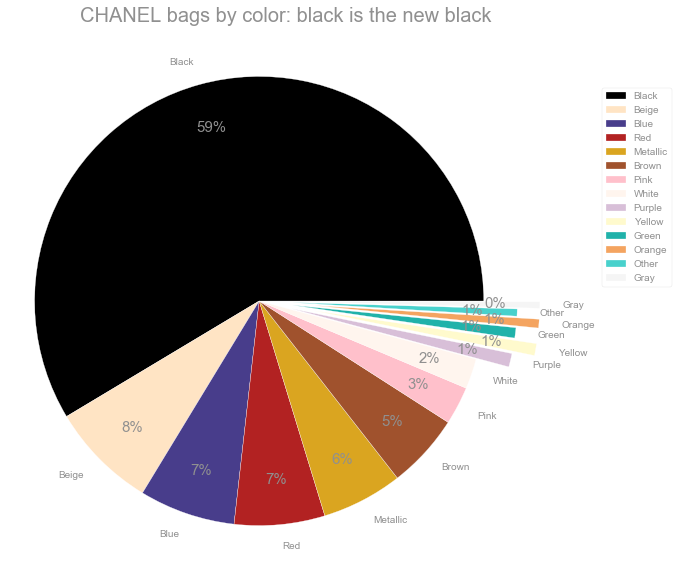

In [283]:
#formatting the chart to make it more esthetically pleasing
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize'] = [10, 10]
# see all X11 color names on https://en.wikipedia.org/wiki/X11_color_names
color_palette_list = ['Black', '#FFE4C4', '#483D8B', '#B22222', '#DAA520',
                      '#A0522D', '#FFC0CB', '#FFF5EE','#D8BFD8', '#FFFACD',
                      '#20B2AA', '#F4A460', '#48D1CC', '#F5F5F5']

percentages = df.groupby('color')['color'].count().sort_values(ascending=False)
labels = percentages.index

explode=(0,0,0,0,0,0,0,0,0.15,0.25,0.15,0.25,0.15,0.25,)
ax.pie(percentages, explode=explode,colors=color_palette_list,autopct='%1.0f%%',
       shadow=False, startangle=0,pctdistance=0.8,labeldistance=1.1, labels=labels)
ax.axis('equal')
ax.set_title("CHANEL bags by color: black is the new black", fontsize=20)
#formatting the legend
ax.legend(frameon=True, bbox_to_anchor=(1.2,0.9))

### 4.2 relationship between features and *price*

To get a first idea of how features impact the price of a bag, we can plot some of these features in function of the price

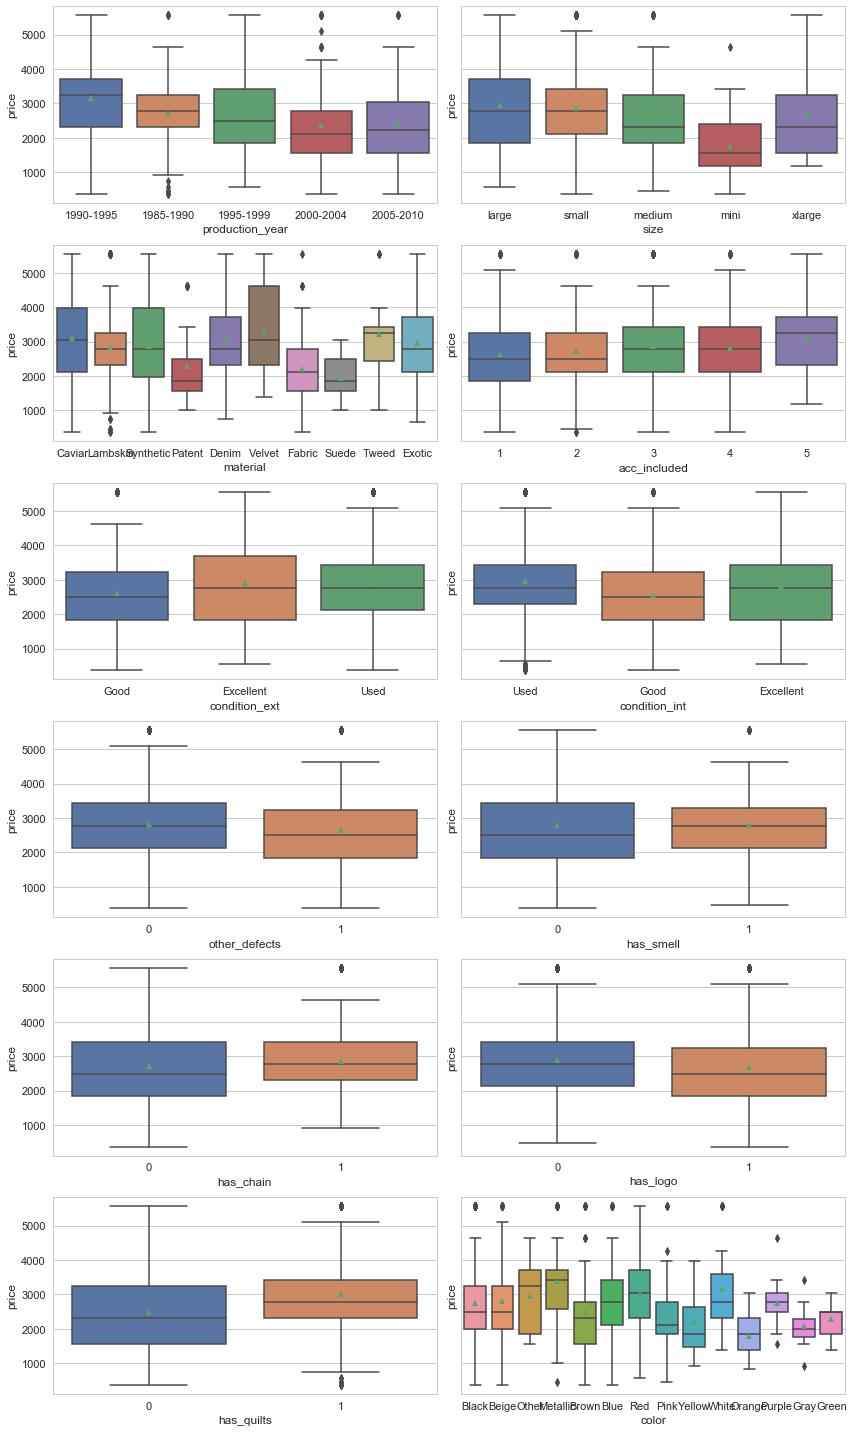

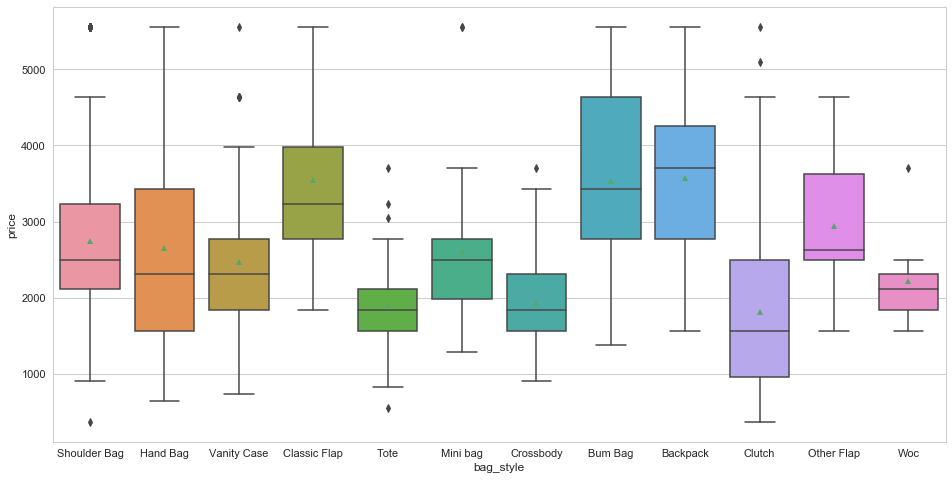

In [354]:
df=df.loc[(df.acc_included<6)]

fig, axes = plt.subplots(6,2, figsize=(12,20), sharey=True)
for xcol, ax in zip(['production_year', 'size', 'material', 'acc_included',
                     'condition_ext', 'condition_int', 'other_defects', 'has_smell',
                     'has_chain', 'has_logo', 'has_quilts','color'], axes.flatten()):
    sns.boxplot(xcol, 'price', data=df, ax=ax,showmeans=True)       
plt.tight_layout()

fig = plt.figure(figsize=(16, 8))
sns.boxplot('bag_style', 'price', data=df,showmeans=True)

In [65]:
sizep = df.groupby(['size']).price.mean()
print(sizep)
print('\n')
yearp = df.groupby(['production_year']).price.mean()
print(yearp)
print('\n')
matp = df.groupby(['material']).price.mean()
print(matp)
print('\n')
accp = df.groupby(['acc_included']).price.mean()
print(accp)
print('\n')
extp = df.groupby(['condition_ext']).price.mean()
print(extp)
print('\n')
haschainquilt1 = (df.loc[(df.has_chain==1)&(df.has_quilts==1)]).price.mean()
haschainquilt0 = (df.loc[(df.has_chain==0)&(df.has_quilts==0)]).price.mean()
print('mean price of quilted and has chains: {}'.format(haschainquilt1))
print("mean price of doesn't have quilts and chains: {}".format(haschainquilt0))
print('\n')
isblack = (df.loc[(df.color=='Black')]).price.mean()
isred = (df.loc[(df.color=='Red')]).price.mean()
isyelorgreen = (df.loc[(df.color=='Yellow')|(df.color=='Orange')|(df.color=='Green')]).price.mean()
print('mean price of black: {}'.format(isblack))
print("mean price of red: {}".format(isred))
print("mean price of yellow, orange or green: {}".format(isyelorgreen))
print('\n')
isflap = (df.loc[(df.bag_style=='Classic Flap')]).price.mean()
istote = (df.loc[(df.bag_style=='Tote')]).price.mean()
isbumback = (df.loc[(df.bag_style=='Bum Bag')|(df.bag_style=='Backpack')]).price.mean()
print('mean price of a classic flap: {}'.format(isflap))
print("mean price of a tote: {}".format(istote))
print("mean price of a bum bag or backpack: {}".format(isbumback))
print('\n')
isclcavblackflap = (df.loc[(df.bag_style=='Classic Flap')&(df.color=='Black')&(df.material=='Caviar')]).price.mean()
print('mean price of a black caviar classic flap: {}'.format(isclcavblackflap))

size
large     2940.897959
medium    2616.948718
mini      1767.072727
small     2863.773569
xlarge    2706.469388
Name: price, dtype: float64


production_year
1985-1990    2731.041379
1990-1995    3170.804659
1995-1999    2691.635328
2000-2004    2378.716418
2005-2010    2454.654676
Name: price, dtype: float64


material
Caviar       3114.443662
Denim        3034.854167
Exotic       2969.846154
Fabric       2195.599222
Lambskin     2833.988189
Patent       2276.107143
Suede        1947.052632
Synthetic    2880.125000
Tweed        3230.187500
Velvet       3285.600000
Name: price, dtype: float64


acc_included
1    2647.942029
2    2735.961464
3    2868.868486
4    2820.257525
5    3161.600000
6    1562.000000
Name: price, dtype: float64


condition_ext
Excellent    2916.928994
Good         2628.627143
Used         2888.626984
Name: price, dtype: float64


mean price of quilted and has chains: 2950.7011952191233
mean price of doesn't have quilts and chains: 2279.0073349633253


mean pr

In [311]:
# putting the clean data in a new csv file
df.to_csv('AmoreChanel_clean2.csv')

## 5. Price prediction

In order to predict the price of a CHANEL bag we'll build a prediction model with the data at hand. I've chosen to use a Gradient boosting algorithm for this since this is one of the most powerful and robuust techniques to build a predictive model.

### 5.1 Building a baseline model

We start with building a baseline model containing only the numerical features from our data set

In [365]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [364]:
#reading in the clean dataset
df = pd.read_csv('AmoreChanel_clean2.csv', index_col="index",header=0)

In [313]:
df.head(5)

,price,production_year,size,color,material,acc_included,condition_ext,condition_int,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style
index,,,,,,,,,,,,,,
0,2771,1990-1995,large,Black,Caviar,4,Good,Used,0,0,1,1,1,Shoulder Bag
1,3050,1985-1990,small,Beige,Lambskin,2,Good,Good,0,0,1,0,1,Hand Bag
3,911,1995-1999,small,Black,Lambskin,3,Excellent,Excellent,0,0,0,0,1,Vanity Case
5,2771,1990-1995,medium,Black,Caviar,1,Used,Used,0,1,1,0,1,Shoulder Bag
6,3236,1990-1995,small,Black,Lambskin,1,Used,Used,0,0,0,0,1,Classic Flap


In [325]:
data = df

cols_to_use = ['acc_included', 'other_defects', 'has_smell','has_logo','has_quilts']
X = data[cols_to_use]
y = data.price

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

my_model = XGBRegressor()

my_model.fit(X_train, y_train)

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions,y_valid)))


[11:02:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 813.619602151113


/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


This baseline model using the gradient boosting algorithm has a mean absolute error (mae) of 814 USD. Let's see if we can further improve this model:

### 5.2 Encoding categorical features

Our baseline model loses valuable data by ignoring all the categorical features, which cannot be used as such in a predictive model.

In order to be able to use the categorical features of our dataset, we'll have to encode these columns. Here I will be using One-Hot encoding for all the categorical features, which generally performs well with categorical variables with a cardinality lower than 15.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('AmoreChanel_clean2.csv', index_col="index",header=0)
data = df
y = data['price']
data.drop(['price'], axis=1, inplace=True)
X = data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=0)

numerical_ix = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X_train.select_dtypes(include=['object']).columns

#print(numerical_ix)
#print(categorical_ix)

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_ix]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[categorical_ix]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(categorical_ix, axis=1)
num_X_test = X_test.drop(categorical_ix, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

my_model = XGBRegressor()

my_model.fit(OH_X_train, y_train)

predictions = my_model.predict(OH_X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions,y_test)))


[15:16:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 603.4047987583706


Be including the categorical features with One-Hot encoding we were able to bring down our mae to 603 USD.
We could consider trying out other methods of encoding (such as label encoding, count-encoding etc).

### 5.3 Parameter tuning

In this section we will be tuning the main parameters of the XGBoost model to try and further improve the performance of our model. I will focus on 6 of the hyperparameters that are usually having a big impact on performance. We will focus on finding a good enough combination by improving our model with as few steps as possible (rather than doing exhaustive and timely cross-combination of all parameters).

We start loading our data into DMatrices, the format most suitable for our downstream process with XGBoost. Next we define a dictionary of parameters that we'll be using and set  default values for each to begin our process with.

In [23]:
# Creating DMatrices
import xgboost as xgb
dtrain = xgb.DMatrix(OH_X_train, label=y_train)
dtest = xgb.DMatrix(OH_X_test, label=y_test)

In [24]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1}

#### Num_boost_rounds

The first parameter we will look at is num_boost_round and corresponds to the number of boosting rounds or trees to build. num_boost_round will be passed as a standalone argument as it's not a part of the params dictionary.

We define a test dataset and a metric (here the mae) that is used to assess performance at each round. If performance haven’t improved for N rounds (N = early_stopping_round), we stop the training and keep the best number of boosting rounds. 

In [25]:
#adding our evaluation metric to the params dictionary
params['eval_metric'] = "mae"
#setting a maximun allowed value to start with
num_boost_round = 999

In [8]:
#The number of rounds without improvements after which we should stop  is set to 10 here.
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10)

[0]	Test-mae:1918.82
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:1355.6
[2]	Test-mae:1008.9
[3]	Test-mae:802.777
[4]	Test-mae:702.019
[5]	Test-mae:651.447
[6]	Test-mae:626.104
[7]	Test-mae:606.606
[8]	Test-mae:599.103
[9]	Test-mae:594.479
[10]	Test-mae:592.274
[11]	Test-mae:593.649
[12]	Test-mae:591.276
[13]	Test-mae:589.902
[14]	Test-mae:590.409
[15]	Test-mae:588.001
[16]	Test-mae:589.434
[17]	Test-mae:591.617
[18]	Test-mae:588.182
[19]	Test-mae:588.308
[20]	Test-mae:593.358
[21]	Test-mae:594.275
[22]	Test-mae:593.9
[23]	Test-mae:592.072
[24]	Test-mae:591.168
[25]	Test-mae:591.722
Stopping. Best iteration:
[15]	Test-mae:588.001



After adding the 15th tree, adding more rounds did not improve the mae here so the max number of boosting rounds on our test data with default parameters is 15. We can keep this in mind although *num_boost_round* will also vary on the other parameters.

#### Setting up cross-validation

In order to tune the other parameters, we will use cross-validation on our training dataset with the cv function from XGBoost
Cross-validation will split the train dataset into nfolds and iteratively keeps one of the folds for test purposes.

First we'll calculate the cross-validation score with our current parameters:

In [9]:
#returns a cv table with row nr = number of boosting trees 
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10)
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,1973.373291,9.585124,1971.332812,43.979527
1,1407.725854,5.879075,1411.790161,38.643784
2,1033.341260,3.180692,1055.736084,36.277107
3,800.452246,4.001734,845.612573,37.782454
4,663.214136,5.198207,729.156860,36.762395
5,582.495129,6.431920,667.730249,33.278180
6,536.015295,6.433837,636.841846,29.816167
7,508.322278,8.524714,620.554480,28.351483
8,488.782916,9.579283,613.045740,27.907666
9,476.055304,10.216855,608.173608,27.125033


In [10]:
cv_results['test-mae-mean'].min()

585.3030272

Here cross-validation shows that we get an optimal mae at 25 rounds with the test data.

#### max_depth and min_child_weight

Both *max_depth* and *min_child_weight* are parameters that can be used to control the complexity of the trees. 

*max_depth* is the maximum number of nodes from the root to the farthest leaf of a tree. As a tree becomes deeper it can model more complex relationships but also overfit, making the model less relevant

*min_child_weight* is the minimum weight required in order to create a new node in the tree. A smaller min_child_weight will allow for more nodes but will also make the model prone to overfitting.

We will tune both of these parameters together to find a good trade-off between model bias and variance. We will start with values in a pre-defined default range:

In [11]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(1,15) #default 6
    for min_child_weight in range(1,10)] #default 5

In [12]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10)
    
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=1, min_child_weight=1
	MAE 655.9961792 for 157 rounds
CV with max_depth=1, min_child_weight=2
	MAE 655.9961792 for 157 rounds
CV with max_depth=1, min_child_weight=3
	MAE 655.9961792 for 157 rounds
CV with max_depth=1, min_child_weight=4
	MAE 655.9961792 for 157 rounds
CV with max_depth=1, min_child_weight=5
	MAE 657.5817628 for 122 rounds
CV with max_depth=1, min_child_weight=6
	MAE 656.9427858 for 145 rounds
CV with max_depth=1, min_child_weight=7
	MAE 656.2579466 for 160 rounds
CV with max_depth=1, min_child_weight=8
	MAE 657.9319948 for 120 rounds
CV with max_depth=1, min_child_weight=9
	MAE 657.1174804 for 132 rounds
CV with max_depth=2, min_child_weight=1
	MAE 607.3087036 for 158 rounds
CV with max_depth=2, min_child_weight=2
	MAE 614.275476 for 106 rounds
CV with max_depth=2, min_child_weight=3
	MAE 619.9688841999999 for 74 rounds
CV with max_depth=2, min_child_weight=4
	MAE 615.6672974 for 87 rounds
CV with max_depth=2, min_child_weight=5
	MAE 613.9114378 for 

	MAE 584.0448732 for 16 rounds
CV with max_depth=13, min_child_weight=7
	MAE 588.0132566 for 14 rounds
CV with max_depth=13, min_child_weight=8
	MAE 598.1667846 for 11 rounds
CV with max_depth=13, min_child_weight=9
	MAE 599.2038208 for 11 rounds
CV with max_depth=14, min_child_weight=1
	MAE 599.7357302 for 10 rounds
CV with max_depth=14, min_child_weight=2
	MAE 585.1910278000001 for 10 rounds
CV with max_depth=14, min_child_weight=3
	MAE 596.641394 for 11 rounds
CV with max_depth=14, min_child_weight=4
	MAE 587.9708008 for 11 rounds
CV with max_depth=14, min_child_weight=5
	MAE 596.1479002 for 10 rounds
CV with max_depth=14, min_child_weight=6
	MAE 591.9233034000001 for 11 rounds
CV with max_depth=14, min_child_weight=7
	MAE 588.5703126000001 for 11 rounds
CV with max_depth=14, min_child_weight=8
	MAE 594.257312 for 12 rounds
CV with max_depth=14, min_child_weight=9
	MAE 604.2518434 for 12 rounds
Best params: 8, 5, MAE: 580.4379882


We get the best score (MAE = 580) with a max_depth of 8 and min_child_weight of 5 so update our params:

In [26]:
params['max_depth'] = 8
params['min_child_weight'] = 5

#### subsample and colsample_bytree

These parameters control the sampling of the dataset that is done at each boosting round.
Instead of using the whole training set every time, we can build a tree on slightly different data at each step, which makes it less likely to overfit to a single sample or feature.

*subsample* corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.

*colsample_bytree* corresponds to the fraction of features (the columns) to use. By default it is set to 1 meaning that we will use all features.

We will be tuning these parameters together:

In [29]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(3,11)]
    for colsample in [i/10. for i in range(3,11)]]

In [30]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
	MAE 580.4379882 for 15 rounds
CV with subsample=1.0, colsample=0.9
	MAE 594.4546876 for 21 rounds
CV with subsample=1.0, colsample=0.8
	MAE 595.5687132 for 16 rounds
CV with subsample=1.0, colsample=0.7
	MAE 596.7722412 for 22 rounds
CV with subsample=1.0, colsample=0.6
	MAE 600.778406 for 22 rounds
CV with subsample=1.0, colsample=0.5
	MAE 592.4399414 for 34 rounds
CV with subsample=1.0, colsample=0.4
	MAE 598.0186768000001 for 34 rounds
CV with subsample=1.0, colsample=0.3
	MAE 596.4856202 for 34 rounds
CV with subsample=0.9, colsample=1.0
	MAE 587.9660768000001 for 19 rounds
CV with subsample=0.9, colsample=0.9
	MAE 597.4319092 for 22 rounds
CV with subsample=0.9, colsample=0.8
	MAE 591.3050292 for 19 rounds
CV with subsample=0.9, colsample=0.7
	MAE 600.8314088 for 28 rounds
CV with subsample=0.9, colsample=0.6
	MAE 603.5070067999999 for 31 rounds
CV with subsample=0.9, colsample=0.5
	MAE 600.1033446 for 12 rounds
CV with subsample=0.9, colsampl

We find an optimal MAE of 580 and update the params:

In [31]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

#### ETA - Learning rate

The ETA parameter controls the learning rate or our model and corresponds to the shrinkage of the weights associated to features after each round. This means that that it defines the amount of "correction" we make at each boosting step.

In order to make our model robust to overfitting, it's good to keep the learning rate low, altough more boosting rounds will be needed with a lower eta, making our model slower. 

Here we try a number of values and time them with the notebook command:

In [32]:
%time

min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'],early_stopping_rounds=10)
    
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 31 µs
CV with eta=0.3
CPU times: user 1.04 s, sys: 5.23 ms, total: 1.05 s
Wall time: 1.05 s
	MAE 580.4379882 for 15 rounds

CV with eta=0.2
CPU times: user 1.46 s, sys: 4.34 ms, total: 1.47 s
Wall time: 1.47 s
	MAE 584.045056 for 26 rounds

CV with eta=0.1
CPU times: user 3.17 s, sys: 15.2 ms, total: 3.18 s
Wall time: 3.27 s
	MAE 582.2723144 for 65 rounds

CV with eta=0.05
CPU times: user 6.18 s, sys: 35.5 ms, total: 6.21 s
Wall time: 6.34 s
	MAE 581.8380982000001 for 139 rounds

CV with eta=0.01
CPU times: user 23.3 s, sys: 101 ms, total: 23.4 s
Wall time: 25.1 s
	MAE 581.7551148 for 568 rounds

CV with eta=0.005
CPU times: user 39.3 s, sys: 104 ms, total: 39.4 s
Wall time: 39.6 s
	MAE 584.8295774000001 for 998 rounds

Best params: 0.3, MAE: 580.4379882


We update this value in our params dictionary:

In [33]:
params['eta'] = .3

And this is what our final parameters dictionary looks like after optimalization:

In [34]:
params

{'max_depth': 8,
 'min_child_weight': 5,
 'eta': 0.3,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'eval_metric': 'mae'}

We can now train our model and see how well it performs:

In [35]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10)

[0]	Test-mae:1918.4
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:1362.09
[2]	Test-mae:1009.71
[3]	Test-mae:795.232
[4]	Test-mae:684.15
[5]	Test-mae:635.144
[6]	Test-mae:606.855
[7]	Test-mae:598.949
[8]	Test-mae:594.257
[9]	Test-mae:596.999
[10]	Test-mae:594.059
[11]	Test-mae:593.949
[12]	Test-mae:595.003
[13]	Test-mae:594.144
[14]	Test-mae:595.154
[15]	Test-mae:590.874
[16]	Test-mae:599.357
[17]	Test-mae:598.091
[18]	Test-mae:596.682
[19]	Test-mae:598.148
[20]	Test-mae:597.501
[21]	Test-mae:595.915
[22]	Test-mae:593.474
[23]	Test-mae:592.999
[24]	Test-mae:592.913
[25]	Test-mae:590.029
[26]	Test-mae:588.971
[27]	Test-mae:589.951
[28]	Test-mae:590.418
[29]	Test-mae:593.734
[30]	Test-mae:592.972
[31]	Test-mae:593.148
[32]	Test-mae:592.289
[33]	Test-mae:593.509
[34]	Test-mae:593.334
[35]	Test-mae:595.656
[36]	Test-mae:596.92
Stopping. Best iteration:
[26]	Test-mae:588.971



In [36]:
print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best MAE: 588.97 in 27 rounds


Although we found the best number of rounds, our model has been trained with more rounds than optimal, thus before using it for predictions, we should retrain it with the good number of rounds. Since we now the exact best num_boost_round, we don't need the *early_stopping_round* anymore.

In [39]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")])

[0]	Test-mae:1918.4
[1]	Test-mae:1362.09
[2]	Test-mae:1009.71
[3]	Test-mae:795.232
[4]	Test-mae:684.15
[5]	Test-mae:635.144
[6]	Test-mae:606.855
[7]	Test-mae:598.949
[8]	Test-mae:594.257
[9]	Test-mae:596.999
[10]	Test-mae:594.059
[11]	Test-mae:593.949
[12]	Test-mae:595.003
[13]	Test-mae:594.144
[14]	Test-mae:595.154
[15]	Test-mae:590.874
[16]	Test-mae:599.357
[17]	Test-mae:598.091
[18]	Test-mae:596.682
[19]	Test-mae:598.148
[20]	Test-mae:597.501
[21]	Test-mae:595.915
[22]	Test-mae:593.474
[23]	Test-mae:592.999
[24]	Test-mae:592.913
[25]	Test-mae:590.029
[26]	Test-mae:588.971


In [38]:
# checking if we obtain the same value when predicting as in the last round of training
mean_absolute_error(best_model.predict(dtest), y_test)

588.9709974888393

This looks good. We can now save our model and use it for predictions!

In [21]:
best_model.save_model("my_model.model")

In [456]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
loaded_model.predict(dtest)

array([2651.3105, 2060.8586, 1886.6903, 4526.257 , 2300.4429, 1867.069 ,
       2630.5872, 3698.848 , 2928.2097, 1790.3328, 2713.9202, 2222.4563,
       2545.9827, 1463.1382, 3877.8293, 2304.539 , 2286.2712, 1875.5558,
       4057.9531, 3453.0886, 2484.221 , 2259.237 , 1513.7087, 3059.1523,
       1753.8229, 2512.986 , 2841.9832, 2271.2876, 2297.7974,  866.7698,
       3096.0479, 2743.5054, 1906.3208, 2584.9333, 2030.3964, 1945.8511,
       3434.3298, 3213.3591, 3191.7832, 3944.6946, 2999.709 , 2413.6262,
       2615.144 , 2995.5823, 1816.9523, 3225.0361, 3825.6165, 3599.1982,
       4058.3433, 2494.3784, 3021.4487, 2584.9333, 1551.4023, 1869.3054,
       1964.6445, 2247.6401, 3217.7263, 2706.0364, 2894.6533, 1661.7062,
       2189.9976, 2928.2097, 4250.541 , 3180.8472, 4154.1978, 1380.3284,
       2216.7463, 2667.5784, 1654.0787, 2531.615 , 1442.9023, 3325.9932,
       1921.2094, 2438.258 , 2566.132 , 2196.85  , 1867.1038, 1640.9893,
       3292.81  , 2548.2422, 3004.102 , 1345.3198, 

### CONCLUSIONS:

In this project we built a prediction model that can **predict the resale-value of a CHANEL bag with 80% accuracy**.
This model is usefull for:

- Resellers to estimate market value of bags when acquiring inventory. This **saves resellers precious time** during sourcing of inventory and **leads to overall higher profits** because of a more accurate market value estimation.

- Allows retail buyers to estimate value retention before deciding to buy a CHANEL bag.

Other interesting take aways from this study are:

- Bags crafted in **Caviar or Lambskin** (average resp. 3100 and 2800 USD) leather hold value better than bags in Patent leather (**-25%**), Fabric(**-27%**), or Suede (**-35%**). Tweed as a fabric is an exception with similar value as caviar. 

- The more **original accessoires** are included with the bag, the higher the resale value (**+17%** for all original accessories vs none).

- While mini-bags have been hyped last summer, this trend ist't reflected anymore in their current value, looking at *Size*, **mini-bags sell for 40% less** compared to large-size bags.
- Bags with CHANEL's hallmark features such as **chain-linked straps and quilted leather** are valued **30% higher** than bags not having these features

- Black is still the new black - **70% of bags on the resale market are black**, altough this doesn't necessarily mean they have a higher resale value. Interestingly red bags have a 10% higher value than black bags.

- Bags in **yellow, green and orange are not a good investment** and have **30% lower** resale value on average compared to other colors

- When it comes to bag styles, **the CHANEL classic flap is the best investment** and has an average resale value of **3500 USD** compared to a tote bag at 1900 USD.

- **Bum bags and backpacks** are still very much on trend and selling **30% above** the average price.
